In [232]:
from visual_genome import api
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image 
import requests
try:
    from StringIO import StringIO ## for Python 2
except ImportError:
    from io import StringIO ## for Python 3
from io import StringIO, BytesIO
import pandas as pd
import json
from PIL import Image, ImageOps
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
%matplotlib inline
import cv2
import numpy as np
import scipy.misc
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import numpy
import tensorflow as tf

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [40]:
for i in range(3,501):
    image = api.get_image_data(id=i)
    image_url=image.url
    image=imageio.imread(image_url)
    flip=iaa.Fliplr(1.0)
    image_aug=flip(image=image)
    im = Image.fromarray(image_aug)
    im.save('image_augmentation/new'+str(i)+'.jpg', 'JPEG')

for i in range(557,1001):
    image = api.get_image_data(id=i)
    image_url=image.url
    image=imageio.imread(image_url)
    #seq
    seq = iaa.Sequential([
    iaa.Fliplr(1.0),
    iaa.AdditiveGaussianNoise(scale=(30, 40))
    ], random_order=True)
    image_aug=seq(image=image)
    #save
    im = Image.fromarray(image_aug)
    im.save('image_augmentation/new'+str(i)+'.jpg', 'JPEG')

for i in range(1001,1501):
    image = api.get_image_data(id=i)
    image_url=image.url
    image=imageio.imread(image_url)
    #seq
    seq = iaa.Sequential([
    iaa.AddToHue((-50, 50))
    #iaa.Fliplr(1.0),
    #iaa.AdditiveGaussianNoise(scale=(30, 40))
    ], random_order=True)
    image_aug=seq(image=image)
    #save
    im = Image.fromarray(image_aug)
    im.save('image_augmentation/new'+str(i)+'.jpg', 'JPEG')

for i in range(1501,2001):
    image = api.get_image_data(id=i)
    image_url=image.url
    image=imageio.imread(image_url)
    #seq
    seq = iaa.Sequential([
    iaa.AddToHue((-50, 50)),
    iaa.Fliplr(1.0),
    #iaa.AdditiveGaussianNoise(scale=(30, 40))
    ], random_order=True)
    image_aug=seq(image=image)
    #save
    im = Image.fromarray(image_aug)
    im.save('image_augmentation/new'+str(i)+'.jpg', 'JPEG')

In [241]:
for i in range(2001,2700):
    image = api.get_image_data(id=i)
    image_url=image.url
    image=imageio.imread(image_url)
    #seq
    seq = iaa.Sequential([
    iaa.AddToHue((-50, 50)),
    iaa.Fliplr(1.0),
    iaa.AdditiveGaussianNoise(scale=(30, 40))
    ], random_order=True)
    image_aug=seq(image=image)
    #save
    im = Image.fromarray(image_aug)
    im.save('image_augmentation/new'+str(i)+'.jpg', 'JPEG')

In [81]:
image = api.get_image_data(id=50)

In [82]:
image.height,image.width

(500, 375)

In [87]:
image1=Image.open('image_augmentation/new1337.jpg')
width,height=image1.size
height,width

(500, 375)

In [88]:
with open('V1.0/relationships.json') as f:
     relations= json.load(f) 

In [296]:
relations[1000]['id']

1001

In [221]:
no_relationship=[]
for i in range(0,1000):
    if not relations[i]['relationships']:
        no_relationship.append(relations[i]['id'])
len(no_relationship)

171

In [293]:
rows=[["ImageID", "LabelName1","LabelName2","ImageHeight","ImageWidth","XMin1",
                   "XMax1","YMin1","YMax1","XMin2","XMax2","YMin2","YMax2","RelationshipLabel"]]

In [119]:
def lines_that_start_with(string, fp):
    return [line for line in fp if line.startswith(string)]
def listToString(s):  
    
    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in s:  
        str1 += ele   
    
    # return string   
    return str1  

In [120]:
datasets=pd.read_csv("datasets.csv")
datasets

,ImageID,LabelName1,LabelName2,ImageHeight,ImageWidth,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel


In [317]:
def first_1000_creat_data(relations):
    data=[]
    for i in range(0,1000):
        if relations[i]['relationships']:
            row=[]
            #add ImageID
            row.append('new'+str(i+1))

            #add two labels names
            subject_name=relations[i]['relationships'][0]['subject']['name']
            object_name=relations[i]['relationships'][0]['object']['name']
            row.append(subject_name)
            row.append(object_name)

            #add image height and width
            image = api.get_image_data(id=i+1)
            ImageHeight=image.height
            ImageWidth=image.width
            row.append(ImageHeight)
            row.append(ImageWidth)

            #add Xmin1,Xmax1,Ymin1,Ymax1
            Xmin1=relations[i]['relationships'][0]['subject']['x']
            Ymin1=relations[i]['relationships'][0]['subject']['y']
            Xmax1=relations[i]['relationships'][0]['subject']['x']+relations[i]['relationships'][0]['subject']['w']
            Ymax1=relations[i]['relationships'][0]['subject']['y']+relations[i]['relationships'][0]['subject']['h']
            new_Xmax1=ImageWidth-Xmin1
            new_Xmin1=ImageWidth-Xmax1
            row.append(new_Xmin1)
            row.append(new_Xmax1)
            row.append(Ymin1)
            row.append(Ymax1)


            #add Xmin2,Xmax2,Ymin2,Ymax2
            Xmin2=relations[i]['relationships'][0]['object']['x']
            Ymin2=relations[i]['relationships'][0]['object']['y']
            Xmax2=relations[i]['relationships'][0]['object']['x']+relations[i]['relationships'][0]['object']['w']
            Ymax2=relations[i]['relationships'][0]['object']['y']+relations[i]['relationships'][0]['object']['h']
            new_Xmax2=ImageWidth-Xmin2
            new_Xmin2=ImageWidth-Xmax2
            row.append(new_Xmin2)
            row.append(new_Xmax2)
            row.append(Ymin2)
            row.append(Ymax2)

            #add relationship
            subject_name=relations[i]['relationships'][0]['subject']['name']
            object_name=relations[i]['relationships'][0]['object']['name']
            relation=relations[i]['relationships'][0]['predicate']
            #word augmentation
#             f = open("v1.4/relationship_aliases.txt", "r")
#             p2=relation+','
#             aliases=lines_that_start_with(p2,f)
#             if not aliases:
#                 new_relation=relation
#             else:
#                 new_relation=listToString(aliases).split(",")[-1]
#             relationship=str(subject_name+' '+new_relation+' '+object_name)
#             relationship=relationship.replace('\n','')
            aug = naw.SynonymAug()
            relationship = aug.augment(str(subject_name+' '+relation+' '+object_name))
            row.append(relationship)
            data.append(row)
    return data
              

In [318]:
def middle_500_creat_data(relations):
    data=[]
    for i in range(1000,1500):
        if relations[i]['relationships']:
            row=[]
            #add ImageID
            row.append('new'+str(i+1))

            #add two labels names
            subject_name=relations[i]['relationships'][0]['subject']['name']
            object_name=relations[i]['relationships'][0]['object']['name']
            row.append(subject_name)
            row.append(object_name)

            #add image height and width
            image = api.get_image_data(id=i+1)
            ImageHeight=image.height
            ImageWidth=image.width
            row.append(ImageHeight)
            row.append(ImageWidth)

            #add Xmin1,Xmax1,Ymin1,Ymax1
            Xmin1=relations[i]['relationships'][0]['subject']['x']
            Ymin1=relations[i]['relationships'][0]['subject']['y']
            Xmax1=relations[i]['relationships'][0]['subject']['x']+relations[i]['relationships'][0]['subject']['w']
            Ymax1=relations[i]['relationships'][0]['subject']['y']+relations[i]['relationships'][0]['subject']['h']
            new_Xmax1=ImageWidth-Xmin1
            new_Xmin1=ImageWidth-Xmax1
            row.append(Xmin1)
            row.append(Xmax1)
            row.append(Ymin1)
            row.append(Ymax1)


            #add Xmin2,Xmax2,Ymin2,Ymax2
            Xmin2=relations[i]['relationships'][0]['object']['x']
            Ymin2=relations[i]['relationships'][0]['object']['y']
            Xmax2=relations[i]['relationships'][0]['object']['x']+relations[i]['relationships'][0]['object']['w']
            Ymax2=relations[i]['relationships'][0]['object']['y']+relations[i]['relationships'][0]['object']['h']
            new_Xmax2=ImageWidth-Xmin2
            new_Xmin2=ImageWidth-Xmax2
            row.append(Xmin2)
            row.append(Xmax2)
            row.append(Ymin2)
            row.append(Ymax2)

            #add relationship
            subject_name=relations[i]['relationships'][0]['subject']['name']
            object_name=relations[i]['relationships'][0]['object']['name']
            relation=relations[i]['relationships'][0]['predicate']
            #word augmentation
            f = open("v1.4/relationship_aliases.txt", "r")
            p2=relation+','
            aliases=lines_that_start_with(p2,f)
            if not aliases:
                new_relation=relation
            else:
                new_relation=listToString(aliases).split(",")[-1]
            relationship=str(subject_name+' '+new_relation+' '+object_name)
            relationship=relationship.replace('\n','')
            row.append(relationship)
            data.append(row)
    return data

In [319]:
def flip_again(relations):
    data=[]
    for i in range(1500,2000):
        if relations[i]['relationships']:
            row=[]
            #add ImageID
            row.append('new'+str(i+1))

            #add two labels names
            subject_name=relations[i]['relationships'][0]['subject']['name']
            object_name=relations[i]['relationships'][0]['object']['name']
            row.append(subject_name)
            row.append(object_name)

            #add image height and width
            image = api.get_image_data(id=i+1)
            ImageHeight=image.height
            ImageWidth=image.width
            row.append(ImageHeight)
            row.append(ImageWidth)

            #add Xmin1,Xmax1,Ymin1,Ymax1
            Xmin1=relations[i]['relationships'][0]['subject']['x']
            Ymin1=relations[i]['relationships'][0]['subject']['y']
            Xmax1=relations[i]['relationships'][0]['subject']['x']+relations[i]['relationships'][0]['subject']['w']
            Ymax1=relations[i]['relationships'][0]['subject']['y']+relations[i]['relationships'][0]['subject']['h']
            new_Xmax1=ImageWidth-Xmin1
            new_Xmin1=ImageWidth-Xmax1
            row.append(new_Xmin1)
            row.append(new_Xmax1)
            row.append(Ymin1)
            row.append(Ymax1)


            #add Xmin2,Xmax2,Ymin2,Ymax2
            Xmin2=relations[i]['relationships'][0]['object']['x']
            Ymin2=relations[i]['relationships'][0]['object']['y']
            Xmax2=relations[i]['relationships'][0]['object']['x']+relations[i]['relationships'][0]['object']['w']
            Ymax2=relations[i]['relationships'][0]['object']['y']+relations[i]['relationships'][0]['object']['h']
            new_Xmax2=ImageWidth-Xmin2
            new_Xmin2=ImageWidth-Xmax2
            row.append(new_Xmin2)
            row.append(new_Xmax2)
            row.append(Ymin2)
            row.append(Ymax2)

            #add relationship
            subject_name=relations[i]['relationships'][0]['subject']['name']
            object_name=relations[i]['relationships'][0]['object']['name']
            relation=relations[i]['relationships'][0]['predicate']
            #word augmentation
#             f = open("v1.4/relationship_aliases.txt", "r")
#             p2=relation+','
#             aliases=lines_that_start_with(p2,f)
#             if not aliases:
#                 new_relation=relation
#             else:
#                 new_relation=listToString(aliases).split(",")[-1]
#             relationship=str(subject_name+' '+new_relation+' '+object_name)
#             relationship=relationship.replace('\n','')
            aug = naw.SynonymAug()
            relationship = aug.augment(str(subject_name+' '+relation+' '+object_name))
            row.append(relationship)
            data.append(row)
    return data
              

In [320]:
def last_creat_data(relations):
    data=[]
    for i in range(2000,2699):
        if relations[i]['relationships']:
            row=[]
            #add ImageID
            row.append('new'+str(i+1))

            #add two labels names
            subject_name=relations[i]['relationships'][0]['subject']['name']
            object_name=relations[i]['relationships'][0]['object']['name']
            row.append(subject_name)
            row.append(object_name)

            #add image height and width
            image = api.get_image_data(id=i+1)
            ImageHeight=image.height
            ImageWidth=image.width
            row.append(ImageHeight)
            row.append(ImageWidth)

            #add Xmin1,Xmax1,Ymin1,Ymax1
            Xmin1=relations[i]['relationships'][0]['subject']['x']
            Ymin1=relations[i]['relationships'][0]['subject']['y']
            Xmax1=relations[i]['relationships'][0]['subject']['x']+relations[i]['relationships'][0]['subject']['w']
            Ymax1=relations[i]['relationships'][0]['subject']['y']+relations[i]['relationships'][0]['subject']['h']
            new_Xmax1=ImageWidth-Xmin1
            new_Xmin1=ImageWidth-Xmax1
            row.append(new_Xmin1)
            row.append(new_Xmax1)
            row.append(Ymin1)
            row.append(Ymax1)


            #add Xmin2,Xmax2,Ymin2,Ymax2
            Xmin2=relations[i]['relationships'][0]['object']['x']
            Ymin2=relations[i]['relationships'][0]['object']['y']
            Xmax2=relations[i]['relationships'][0]['object']['x']+relations[i]['relationships'][0]['object']['w']
            Ymax2=relations[i]['relationships'][0]['object']['y']+relations[i]['relationships'][0]['object']['h']
            new_Xmax2=ImageWidth-Xmin2
            new_Xmin2=ImageWidth-Xmax2
            row.append(new_Xmin2)
            row.append(new_Xmax2)
            row.append(Ymin2)
            row.append(Ymax2)

            #add relationship
            subject_name=relations[i]['relationships'][0]['subject']['name']
            object_name=relations[i]['relationships'][0]['object']['name']
            relation=relations[i]['relationships'][0]['predicate']
            #word augmentation
            f = open("v1.4/relationship_aliases.txt", "r")
            p2=relation+','
            aliases=lines_that_start_with(p2,f)
            if not aliases:
                new_relation=relation
            else:
                new_relation=listToString(aliases).split(",")[-1]
            relationship=str(subject_name+' '+new_relation+' '+object_name)
            relationship=relationship.replace('\n','')
#             aug = naw.SynonymAug()
#             relationship = aug.augment(str(subject_name+' '+relation+' '+object_name))
            row.append(relationship)
            data.append(row)
    return data
              

In [321]:
first_1000=first_1000_creat_data(relations)
middle_1500=middle_500_creat_data(relations)
back_flip=flip_again(relations)
last_part=last_creat_data(relations)

In [322]:
rows=[["ImageID", "LabelName1","LabelName2","ImageHeight","ImageWidth","XMin1",
                   "XMax1","YMin1","YMax1","XMin2","XMax2","YMin2","YMax2","RelationshipLabel"]]

In [323]:
for i in first_1000:
    rows.append(i)
    
for i in middle_1500:
    rows.append(i)
    
for i in back_flip:
    rows.append(i)
    
for i in last_part:
    rows.append(i)

In [324]:
len(rows)

2075

In [325]:
import csv
with open('datasets.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)
    

In [327]:
datasets=pd.read_csv("datasets.csv")

In [328]:
new_datasets=datasets[datasets.select_dtypes(include=[np.number]).ge(0).all(1)]
compression_opts = dict(method='zip',
                        archive_name='final_dataset.csv')  
new_datasets.to_csv('out.zip', index=False,
          compression=compression_opts) 

In [365]:
new_datasets[616:617]

,ImageID,LabelName1,LabelName2,ImageHeight,ImageWidth,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel
638,new784,snow,ground,600,800,1,800,305,600,2,800,323,598,snow be on the ground


In [367]:
relations[783]['relationships'][0]

{'predicate': 'is on the',
 'object': {'name': 'ground',
  'h': 275,
  'w': 798,
  'y': 323,
  'x': 0,
  'id': 7221732},
 'id': 3077609,
 'subject': {'name': 'snow',
  'h': 295,
  'w': 799,
  'y': 305,
  'x': 0,
  'id': 7221731}}

In [331]:
image = api.get_image_data(id=4)

In [338]:
image.width,image.height

(640, 480)

In [276]:
subject,object1

('lady', 'crosswalk')

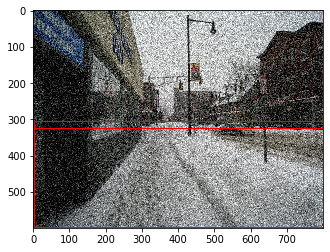

In [369]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

im = np.array(Image.open('image_augmentation/new784.jpg'), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect1 = patches.Rectangle((1,305),799,295,linewidth=1,edgecolor='r',facecolor='none')
rect2 = patches.Rectangle((2,323),798,275,linewidth=1,edgecolor='r',facecolor='none')
# # Add the patch to the Axes
ax.add_patch(rect1)
ax.add_patch(rect2)

plt.show()

In [371]:
new_datasets

,ImageID,LabelName1,LabelName2,ImageHeight,ImageWidth,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel
0,new1,shade,street,600,800,407,681,338,530,9,723,328,590,shade on street
1,new2,man,backpack,600,800,334,476,320,575,369,441,362,443,man wear thin backpack
2,new3,keyboard,monitor,480,640,297,472,273,321,332,481,119,274,keyboard in front of monitor
3,new4,curtains,curtains,480,640,0,280,1,301,0,280,1,301,curtains have mantle
4,new5,cables,floor,600,800,450,499,448,536,449,798,490,598,cables on flooring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,new2691,sign,pole,600,800,251,275,410,434,261,269,430,478,sign on a pole
2070,new2692,median,road,600,800,61,296,402,418,9,800,402,594,median are in an road
2071,new2693,white line,road,600,800,432,450,467,483,277,747,432,597,white line are painted in road
2072,new2694,wall,building,600,800,504,797,377,418,658,790,326,384,wall on the side of a building
